In [4]:
toy = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_16khz/002.wav'

In [ ]:
from pyannote.audio.pipelines import VoiceActivityDetection
pipeline = VoiceActivityDetection(segmentation="pyannote/segmentation")
HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.5, "offset": 0.5,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}
pipeline.instantiate(HYPER_PARAMETERS)
vad = pipeline(toy)
# `vad` is a pyannote.core.Annotation instance containing speech regions

In [ ]:
from pyannote.audio.pipelines import OverlappedSpeechDetection
pipeline = OverlappedSpeechDetection(segmentation="pyannote/segmentation")
pipeline.instantiate(HYPER_PARAMETERS)
osd = pipeline(toy)
# `osd` is a pyannote.core.Annotation instance containing overlapped speech regions

In [ ]:
from pyannote.audio import Inference
inference = Inference("pyannote/segmentation")
segmentation = inference(toy)
# `segmentation` is a pyannote.core.SlidingWindowFeature
# instance containing raw segmentation scores like the 
# one pictured above (output)

In [5]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization")
output = pipeline(toy)

#for turn, _, speaker in output.itertracks(yield_label=True):
# speaker speaks between turn.start and turn.end

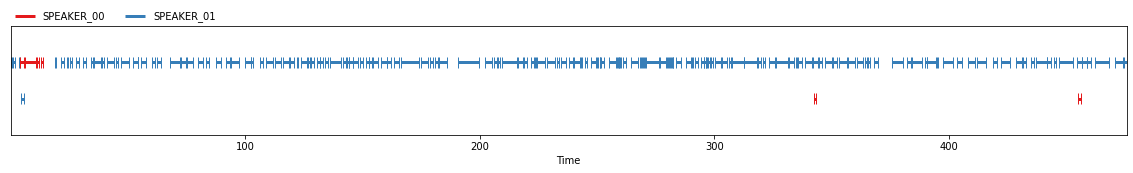

In [6]:
output

In [74]:
test1 = [output for segment, track, label in output.itertracks(yield_label=True) if label=='SPEAKER_01']
len(test1), len(output)

(165, 184)

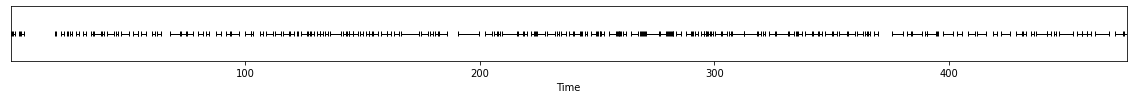

In [81]:
sub = output.label_timeline('SPEAKER_01')
sub

In [82]:
from pyannote.audio import Inference
inference = Inference("pyannote/embedding", window="whole")
embedding1 = inference(sub)

Downloading:   0%|          | 0.00/96.4M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00k [00:00<?, ?B/s]

ValueError: 
Audio files can be provided to the Audio class using different types:
    - a "str" or "Path" instance: "audio.wav" or Path("audio.wav")
    - a "IOBase" instance with "read" and "seek" support: open("audio.wav", "rb")
    - a "Mapping" with any of the above as "audio" key: {"audio": ...}
    - a "Mapping" with both "waveform" and "sample_rate" key:
        {"waveform": (channel, time) numpy.ndarray or torch.Tensor, "sample_rate": 44100}

For last two options, an additional "channel" key can be provided as a zero-indexed
integer to load a specific channel: {"audio": "stereo.wav", "channel": 0}
